<a href="https://colab.research.google.com/github/charlottevedrines/Java-Projects/blob/main/Assignment_7_MIE304_vedrines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Tabular CUSUM Chart

A bio-ink factory specializes in creating a novel printing fibrin-based ink. They are actively measuring impurities per billion with an assay machine throught the day. The sample number being used is 10. The scientist have reasons to believe that there is a shift in the mean, so they set to detect a change of 0.2. The process mean is 0.21 and the process standard deviation is 0.0198. Assuming H has a tolerance equal to H = (+/-)4 * std:

- Calculate K
- Calculate H+ and H-
- Create a tabular CUSUM chart

Are there any samples that are not in control? If so, which ones?

In [6]:
import pandas as pd, numpy as  np
import numpy as np

# 15 samples of size 10
n = 10

z_arr = [0.235, 0.222, 0.198, 0.227, 0.199,
           0.242, 0.206, 0.196, 0.221, 0.212,
           0.231, 0.246, 0.249, 0.245, 0.255]


mu_0 = 0.21
mu_1 = 0.23
sd = 0.0198 / np.sqrt(n)

K = 0.2*sd
print("K", K)

h = 4
H = h*sd
print("H+", H)
print("H-", -1*H)

Sm_plus = []
Sm_plus_temp = 0
Sm_minus =[]
Sm_minus_temp = 0

for i in range(len(z_arr)):

  # Calculation Sm_plus
  temp_plus = max(0 , z_arr[i]-(mu_0+K)+Sm_plus_temp)
  Sm_plus.append(temp_plus)
  Sm_plus_temp = temp_plus

  # Calculation Sm_minus
  temp_minus = max(0 , (mu_0+K)- z_arr[i] + Sm_minus_temp)
  Sm_minus.append(temp_minus)
  Sm_minus_temp = temp_minus

df = pd.DataFrame(z_arr, columns=['Xi'])
df.insert(1,"Sm_plus", Sm_plus, True)
df.insert(2,"Sm_minus", Sm_minus, True)

df

K 0.0012522619534266783
H+ 0.025045239068533565
H- -0.025045239068533565


,Xi,Sm_plus,Sm_minus
0,0.235,0.023748,0.000000
1,0.222,0.034495,0.000000
2,0.198,0.021243,0.013252
3,0.227,0.036991,0.000000
4,0.199,0.024739,0.012252
5,0.242,0.055486,0.000000
6,0.206,0.050234,0.005252
7,0.196,0.034982,0.020505
8,0.221,0.044730,0.010757
9,0.212,0.045477,0.010009


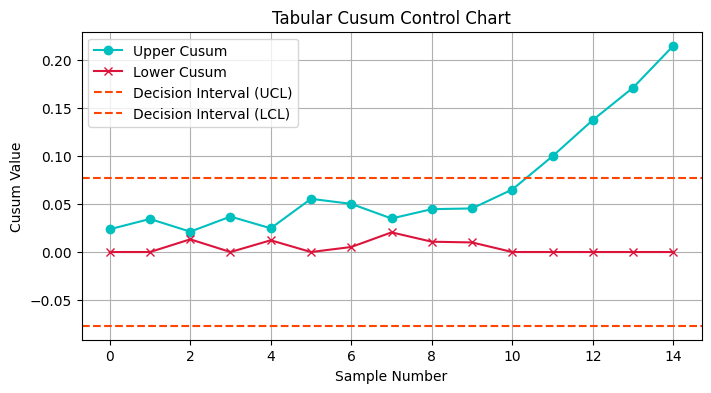

In [7]:
import matplotlib.pyplot as plt


# CUSUM Chart
index_list = df.index.tolist()
sample_sigma = np.std(df['Xi'])

plt.figure(figsize=(8, 4))
plt.plot(index_list, Sm_plus, label='Upper Cusum', marker='o', linestyle='-', color='c')
plt.plot(index_list, Sm_minus, label='Lower Cusum', marker='x', linestyle='-', color='crimson')
plt.axhline(y=h*sample_sigma, color='orangered', linestyle='--', label='Decision Interval (UCL)')
plt.axhline(y=-h*sample_sigma, color='orangered', linestyle='--', label='Decision Interval (LCL)')
plt.title('Tabular Cusum Control Chart')
plt.xlabel('Sample Number')
plt.ylabel('Cusum Value')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Finding OOC samples
OOC_samples_upwards = []
OOC_samples_downwards = []

for j in range(len(Sm_plus)):
  if Sm_plus[j] > H:
    OOC_samples_upwards.append(j)
    break
  elif Sm_minus[j] > H:
    OOC_samples_downwards.append(j)
    break

print("Samples that undergo a downwards shift:", OOC_samples_downwards)
print("Samples that undergo an upwards shift:", OOC_samples_upwards)

print("Sample", OOC_samples_upwards[0], "is the first sample to go out of control.")
print("The process would be stopped and fixed due to the OOC situation so the points that follow would not have happened") # from piazza question 254

Samples that undergo a downwards shift: []
Samples that undergo an upwards shift: [1]
Sample 1 is the first sample to go out of control.
The process would be stopped and fixed due to the OOC situation so the points that follow would not have happened


2. Very fine powder

A nanomaterials company manufactures a powder for biomedical applications. The particle size of said powder must be between 68 nm and 76 nm. The process used for keeping the particles to their correct size has a standard deviation of 1.5 nm. The mean value for these particles is 70.2 nm. Answer the following:
- Calculate the upper Cpk and the lower Cpk
- What is the process capability index (Cpk) for this process? Does it meet the company's requirements?
- Is the process centrally located? If not, to which direction is its skewed towards?

In [9]:
USL = 76
LSL = 68
mu = 70.2
sigma = 1.5

upper_Cpk = (USL-mu)/(3*sigma)
lower_Cpk = (mu-LSL)/(3*sigma)
print("The upper Cpk is", round(upper_Cpk,3), "the lower Cpk is", round(lower_Cpk,3))

Cpk = min(lower_Cpk, upper_Cpk)
print("The process capability index is", round(Cpk,3))
print("Cpk is less than 1 meaning the process it not capable thereby not meeting company requirements.")


# A process is centrally located if the upper and lower Cpk values are approximately equal.
# Here, the lower Cpk is significantly less than the upper Cpk.
# This indicates that the mean is not centrally located and is closer to the lower specification limit than to the upper one,
# suggesting that the process is skewed towards the lower limit.

The upper Cpk is 1.289 the lower Cpk is 0.489
The process capability index is 0.489
Cpk is less than 1 meaning the process it not capable thereby not meeting company requirements.


3. Blast furnace's process capability

A manufacturer company is testing the heating stability of one of their main blast furnaces. They set to sample the temperature in May and in June. They want to make sure that they are able to observe 99.976737% of the data. With the given information located on "P3.csv" answer the following information for each month:

- Does the furnace temperature follow a Gaussian distribution?
- What is the process capability index (Cpk) of the furnace? Is it centrally located?
- The company is looking for their blast furnace to adhere to a Cp of 1.3, do they satisfy this requirement?

Note: calculate Cp specifically with a tolerance of 3, for the rest use the standard deviation corresponding to an observability of 99.976737%.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy.stats as sts

# Does the furnace temperature follow a Gaussian distribution?

file_path = '/content/drive/My Drive/MIE304/A7/P3.csv'

df = pd.read_csv(file_path)

w, p_value = sts.shapiro(df['June'])
print(f"Shapiro-Wilk Test P-value: {p_value}")

if p_value > 0.05:
    print("The June temperature data follows a Gaussian distribution.")
else:
    print("The June temperature data does not follow a Gaussian distribution.")

print("")
w, p_value = sts.shapiro(df['May'])
print(f"Shapiro-Wilk Test P-value: {p_value}")

if p_value > 0.05:
    print("The May temperature data follows a Gaussian distribution.")
else:
    print("The May temperature data does not follow a Gaussian distribution.")

Shapiro-Wilk Test P-value: 0.0057421536184847355
The June temperature data does not follow a Gaussian distribution.

Shapiro-Wilk Test P-value: 0.015669887885451317
The May temperature data does not follow a Gaussian distribution.


In [13]:
# Assuming a normal distribution moving forward

# Calculation for the month of May

# What is the process capability index (Cpk) of the furnace? Is it centrally located?

mu = np.mean(df['May'])
sigma = np.std(df['May'])

z = 3.9 # approximated from the normal table for a probability of 99.976737%
USL = mu + z*sigma
LSL = mu - z*sigma

upper_Cpk = (USL-mu)/(3*sigma)
lower_Cpk = (mu-LSL)/(3*sigma)
print("The upper Cpk for May is", round(upper_Cpk,3), "the lower Cpk for May is", round(lower_Cpk,3))

Cpk = min(lower_Cpk, upper_Cpk)
print("The process capability index for May is", round(Cpk,3))

The upper Cpk for May is 1.3 the lower Cpk for May is 1.3
The process capability index for May is 1.3


In [14]:
# Calculation for the month of June

# What is the process capability index (Cpk) of the furnace? Is it centrally located?

mu = np.mean(df['June'])
sigma = np.std(df['June'])

z = 3.9 # approximated from the normal table for a probability of 99.976737%
USL = mu + z*sigma
LSL = mu - z*sigma

upper_Cpk = (USL-mu)/(3*sigma)
lower_Cpk = (mu-LSL)/(3*sigma)
print("The upper Cpk for June is", round(upper_Cpk,3), "the lower Cpk for June is", round(lower_Cpk,3))

Cpk = min(lower_Cpk, upper_Cpk)
print("The process capability index for June is", round(Cpk,3))


The upper Cpk for June is 1.3 the lower Cpk for June is 1.3
The process capability index for June is 1.3


Answer: A process is centrally located if the upper and lower Cpk values are approximately equal.
For the month of May and June, the lower Cpk is equal to the upper Cpk, indicating that the mean is centrally located for both months.



The company is looking for their blast furnace to adhere to a Cp of 1.3, do they satisfy this requirement?

Answer: Yes, the process capability index is 1.3 therefore they satisfy the requirement.

4. Gage R&R

An Aeronatics company wants to evaluate the performance of its laser-cutting machine. Specifically, said company is interested in evaluating the repeatability and reproducibility of their machine regarding its capacity to create rectangular protrusions on steel sheets (length in micrometers). The collected a dataset for performing said tasked and saved it on "RnR_P4.csv" file. With the available data:

- Calculate SSp, SSo, SSop, and their respective MS.
- Install the pypetb library and perform an ANOVA RnR Gauge report. Evaluate if your calculations align with your previous calculations.
- Generate an RnR report using the pypet library. From the generated information, what conclusions can be gathered from the percentage repeatability and reproducibility metric (%R&R)? Is the sample range in control for every operator?

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

#Calculate SSp, SSo, SSop, and their respective MS
file_path = '/content/drive/My Drive/MIE304/A7/RnR_P4.csv'

df = pd.read_csv(file_path)

df = df.drop('Unnamed: 0', axis=1)

#df

In [16]:
from sklearn.metrics import mean_squared_error

p = 10 # number of parts, ith part
o = 3 # number of operators, jth operator
n = 3 # number of readings per operator, kth reading

SSo = 0
SSo_j = 0
X_bar_bar = np.mean(df['Measurement'])

for j in range(len(df['Operator'].unique())):
  Xj_bar = np.mean(df['Measurement'][df['Operator']== df['Operator'].unique()[j]] )
  SSo_j = p*n *( Xj_bar - X_bar_bar )**2
  SSo += SSo_j

MSo = SSo / (o-1)
print("SSo", SSo, "MSo", MSo )


SSp_i = 0
SSp = 0

for i in range(len(df['Part'].unique())):
  Xi_bar = np.mean(df['Measurement'][ df['Part'] == df['Part'].unique()[i] ] )
  SSp_i = o*n *( Xi_bar - X_bar_bar )**2
  SSp += SSp_i

MSp = SSp / (p-1)
print("SSp", SSp, "MSp", MSp)


grouped_mean_measurements = df.groupby(['Part', 'Operator'])['Measurement'].transform('mean')

SSe_ijk = ( df['Measurement'] - grouped_mean_measurements )**2

SSe = sum(SSe_ijk)

#print("SSe", SSe)

SSt = 0
SSt_ijk = (df['Measurement'] - X_bar_bar )**2
SSt = sum(SSt_ijk)

#print("SSt", SSt)

SSop = SSt - SSp - SSo - SSe

MSop = SSop / (p*o*(n-1))
print("SSop", SSop, "MSop", MSop)

SSo 3.80356222222221 MSo 1.901781111111105
SSp 90.98057888888893 MSp 10.108953209876548
SSop 0.5534377777777619 MSop 0.0092239629629627


In [19]:
!pip install pypetb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


                       DF         SS         MS           F             P
Source of variability                                                    
Technician              2   3.803562   1.901781   61.853494  8.608573e-09
Part                    9  90.980579  10.108953  328.783406  1.110223e-16
TechxPart (iteration)  18   0.553438   0.030747    0.688407  8.087340e-01
Repeatability with     60   2.679800   0.044663         NaN           NaN
Repeatability without  78   3.233238   0.041452         NaN  8.087340e-01
Total                  89  98.017379        NaN         NaN           NaN


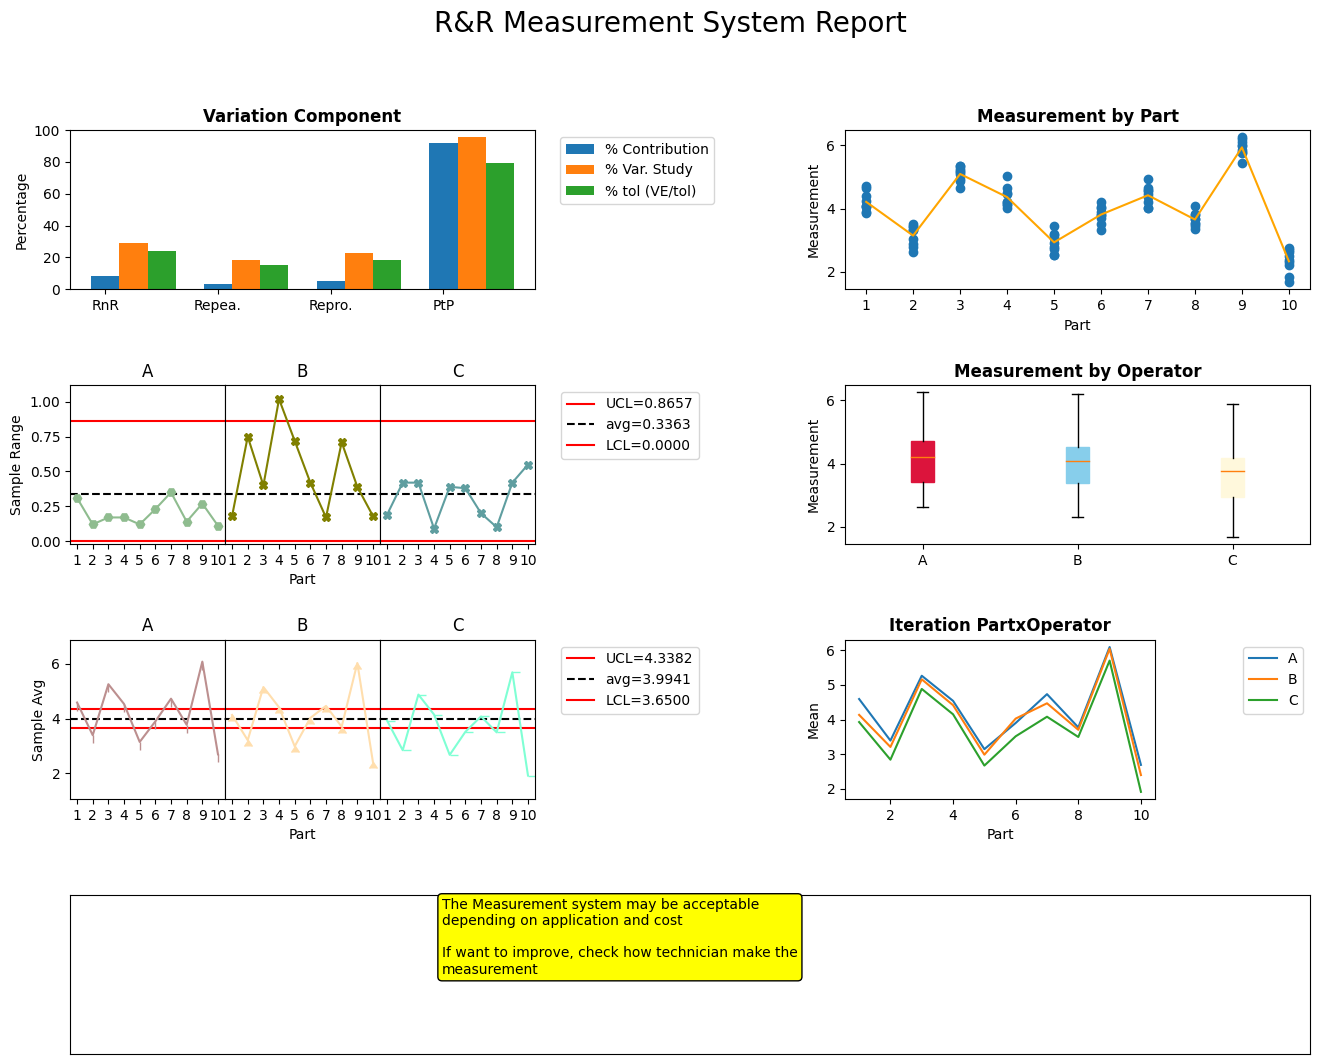

Model is created
== DATASET EVALUATION ==
Operator: 3
Trials: 3
Piezes: 10
== CALCULATION ==
Total data: 90
Max. measured value: 6.2600
Min. measured value: 1.6800
Avg. measured value: 3.9941
Avg. Control limits
UCL: 4.3382
LCL: 3.6500
Avg. Range measured: 0.3363
Range Control limits
UCL: 0.8657
LCL: 0.0000
Sum of deviation by operator: 0.126785
Total Operator Sum of deviation: 3.803562
Sum of deviation by part: 10.108953
Total Part Sum of deviation: 90.980579
Total squared deviation: 98.017379
Equipment squared deviation: 2.679800
Iteration sum of squared: 0.553438



In [20]:
from pypetb import RnR

#import GaugeRnR

#Build up the model and perform an ANOVA RnR Gauge report
#read_csv, save to "df"

dictKey={
        '1':'Operator',
        '2':'Part',
        '3':'Measurement'
        }

RnRModel=RnR.RnRNumeric(
    mydf_Raw=df,
    mydict_key=dictKey,
    mydbl_tol=8
    )

RnRModel.RnRSolve()
dfResult=RnRModel.RnRAnova()

#Anova table
print(dfResult)
call=RnRModel.RnR_Report()

#Dataset evaluation
plt.show()
print(RnRModel.getLog())

Evaluate if your calculations align with your previous calculations.

Answer: The SSo, SSe, SSop and their respective MSEs match the ANOVA RnR Gauge report.

In [23]:
# Using the fomula sigma_m^2 = sigma^2 + sigma_e^2

var = np.var(df['Measurement'])
var_e = SSe/(p*o*(n-1))
var_m = var + var_e

Percentage_RR = 100 * np.sqrt(var_e) / np.sqrt(var_m)
print("The percentage repeatability and reproducibility metric (%R&R) is", Percentage_RR,"%")

The percentage repeatability and reproducibility metric (%R&R) is 19.84804849300819 %


From the generated information, what conclusions can be gathered from the percentage repeatability and reproducibility metric (%R&R)?

Answer: A %R&R of 19.9% (so between 10 and 30%), may be acceptable depending on the application. In this example, a laser-cutting machine in an aeronautics company requires high precision, suggesting the measurement system might require improvement.